# Question 3

# (a) Implementing multivariate linear regression from scratch usign gradient descent

In [90]:
#importing the required libraries
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Defining hypothesis function 

In [91]:
# defining a function to calculate the X.w' component
#n = num of features
#we will use this function later to predict target variable for test data
def hypothesis(w, X, n):
    #initializing the variable
    h = np.ones((X.shape[0],1))
    
    #taking transpose of w
    w = w.reshape(1,n+1)
    
    #for all the samples present, return X.w'
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(w, X[i]))
        
    #making it a list of X.w' components
    h = h.reshape(X.shape[0])
    return h

## Function to compute descent 

In [92]:
def gradient_descent(w, alpha, epochs, h, X, y, n):
    cost = np.ones(epochs)
    for i in range(0,epochs):
        w[0] = w[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            #performing the descent, updating w according to GD algo
            w[j] = w[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        #now the new hypothesis becomes the X.w' 
        #calculated from the updated values of w
        h = hypothesis(w, X, n)
        
        #calculating the MSE cost and storing it in the cost array
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    w = w.reshape(1,n+1)
    return w, cost

## Function to initialize and call GD

In [93]:
def fit_model(X, y, alpha, epochs):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    w = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(w, X, n)
    # returning the optimized parameters by Gradient Descent...
    w, cost = gradient_descent(w,alpha,epochs,h,X,y,n)
    return w, cost

# (b) Validating the model on glucose dataset

## Preparing data

In [94]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
#ones = np.ones((diabetes_X_train.shape[0],1))
#diabetes_X_train = np.concatenate((ones,diabetes_X_train),axis=1)
diabetes_X_test = diabetes_X[-20:]
#ones = np.ones((diabetes_X_test.shape[0],1))
#diabetes_X_test = np.concatenate((ones,diabetes_X_test),axis=1)

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

## Running GD

In [95]:
#defining required parameters
alpha = 0.6
epochs = 4000

w_k , cost = fit_model(diabetes_X_train,diabetes_y_train,alpha,epochs)

Text(0, 0.5, 'Cost')

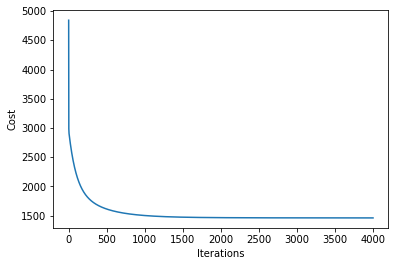

In [96]:
#plotting the cost or error v/s the number of iterations
cost = list(cost)
iterations = [x for x in range(1,4001)]
plt.plot(iterations,cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')

We can see that the cost the gradually reducing and stagnates at around the 2000th iteration. We say here that that gradient descent has converged. 

## Predicting target variable 

In [97]:
#Adding the W0 column to X so that we can multiply the matrices properly
X_test = np.concatenate((np.ones((diabetes_X_test.shape[0],1)),diabetes_X_test),axis=1)

In [98]:
#using the discovered set of values of w_k for which cost is minimum,
#we make a new prediction on test data
y_pred = hypothesis(w_k, X_test, X_test.shape[1] - 1)

## Calculating R^2

In [99]:
RSS = np.mean((y_pred-diabetes_y_test)**2)/(np.std(diabetes_y_test)**2)
Rsq = 1-RSS
print("RSS per sample = {0:f}".format(RSS))
print("Coefficient of determination of custom model R^2 = {0:f}".format(Rsq))

RSS per sample = 0.415230
Coefficient of determination of custom model R^2 = 0.584770


## Implementing Sklearn's version of MLR

In [100]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination of Sklean model (R^2): %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2004.57
Coefficient of determination of Sklean model (R^2): 0.59


## Conclusion

We can see from the two R^2 values that the custom implementation of linear regression using gradient descent is giving us an R^2 value very close to that of the one produced by sklearn's implementation

Thus we have validated our model.

# Question 4

### (a) Reading the data and plotting to check if the data is read correctly

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [102]:
names =[
't', # Time (secs)
'q1', 'q2', 'q3', # Joint angle
'dq1', 'dq2', 'dq3', # Joint velocity
'I1', 'I2', 'I3', # Motor current (A)
'eps21', 'eps22', 'eps31', 'eps32', # Strain measurements
'ddq1', 'ddq2', 'ddq3' # Joint accelerations
]

#creating two dataframes for training and testing data 

df_train = pd.read_csv('C:\\Users\\prajw\\Documents\\NYU SEMS\\Spring 2020\\Machine Learning\\Homeworks\\Homework2\\exp_train.csv', header=None,sep=',',
names=names, index_col=0)
df_test = pd.read_csv('C:\\Users\\prajw\\Documents\\NYU SEMS\\Spring 2020\\Machine Learning\\Homeworks\\Homework2\\exp_test.csv', header=None,sep=',',
names=names, index_col=0)

#printing the first 6 rows to have a peak at the data and check that it is loaded correctly
df_train.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


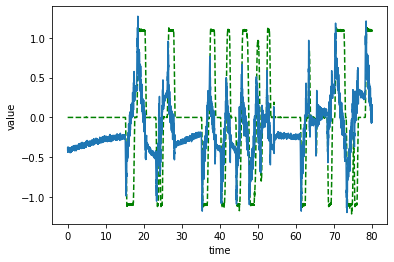

In [103]:
#plotting velocity and current v/s time to further check if the data makes sense and observe an expected trend
#we would intuitively expect current drawn to increase as the velocity of the robot arm increases.

I1 = df_train['I2']
velocity = df_train['dq2']
plt.plot(velocity,'g--',label='velocity')
plt.plot(I1,label="current")
plt.xlabel('time')
plt.ylabel('value')
plt.show()

Observing from the above plot that as velocity increases, current also increases and vice versa. Directly propertional relation seems right.

### (b) Creating the training data

We will define a vector y which is our label to be predicted. This is the column 'I2' in the given training dataset.

Next, we create a vector X, holding all the relevant columns that affect y, ie, all the features.

In [104]:
#Labels y: A vector of all the samples in the ‘I2’ column
#Data X: A matrix of the data with the columns: [‘q2’,‘dq2’,‘eps21’,‘eps22’, ‘eps31’, ‘eps32’,‘ddq2’]
y = df_train['I2']
X = df_train[['q2','dq2','eps21','eps22', 'eps31','eps32','ddq2']]

#verifying selection
print(y.shape)
print(X.shape)

(8000,)
(8000, 7)


### (c) Fitting a linear model between X and y 

In [105]:
#calling sklearn's Linear Regression implementation
regr = linear_model.LinearRegression()     #loaded the model
regr.fit(X,y)                              # fit the model to our data by passing features and label
regr.intercept_

-0.08408083770450892

Reporting the MSE of the trained model

In [106]:
y_pred = regr.predict(X)
MSE = mean_squared_error(y, y_pred)
print("MSE: {} ".format(MSE))

MSE: 0.010936466882766276 


### (d) Using the linear model to report the MSE on the test data contained in the attached exp_test.csv file.
Calcualting MSE on y_actual and y_pred.
$$ MSE = \frac{1}{N} \sum_{1}^{N} (y_{actual} - y_{predicted})^2 $$

Making prediction. Setting new X_test to have the model predict values for our test data. Then we can evaluate MSE by comparing actual and predicted

In [110]:
X_test = df_test[['q2','dq2','eps21','eps22', 'eps31','eps32','ddq2']] #test data on the basis of which prediction is made
y_actual = df_test['I2']                    #actual data in out test.csv
y_pred = regr.predict(X_test)            #values predicted by our model

In [111]:
MSE = mean_squared_error(y_actual, y_pred)
print("MSE: {} ".format(MSE))

MSE: 0.009723098281465465 
